# IMPORTANDO LIBRERIAS

In [31]:
import numpy as np 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as ply

# CARGA DE DATOS

In [32]:
df_jobs= pd.read_csv("data/fake_job_postings.csv")

# ANÁLISIS EXPLORATORIO
- Revisión de la estructura de los datos (registros y tipos)
- Comprobación de datos nulos
- Comprobación de datos duplicados
- Realización de estadísticas descriptivas básicas

# df_jobs.csv

In [33]:
df_jobs.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [34]:
df_jobs.shape

(17880, 18)

In [35]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [36]:
df_jobs.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [37]:
# Visualización de valores nulos
df_jobs.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [38]:
# Verificación de valores duplicados
df_jobs.duplicated().sum()

0

In [39]:
# Estadísticas descriptivas de las variables numéricas
df_jobs.select_dtypes(include=[np.number]).describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

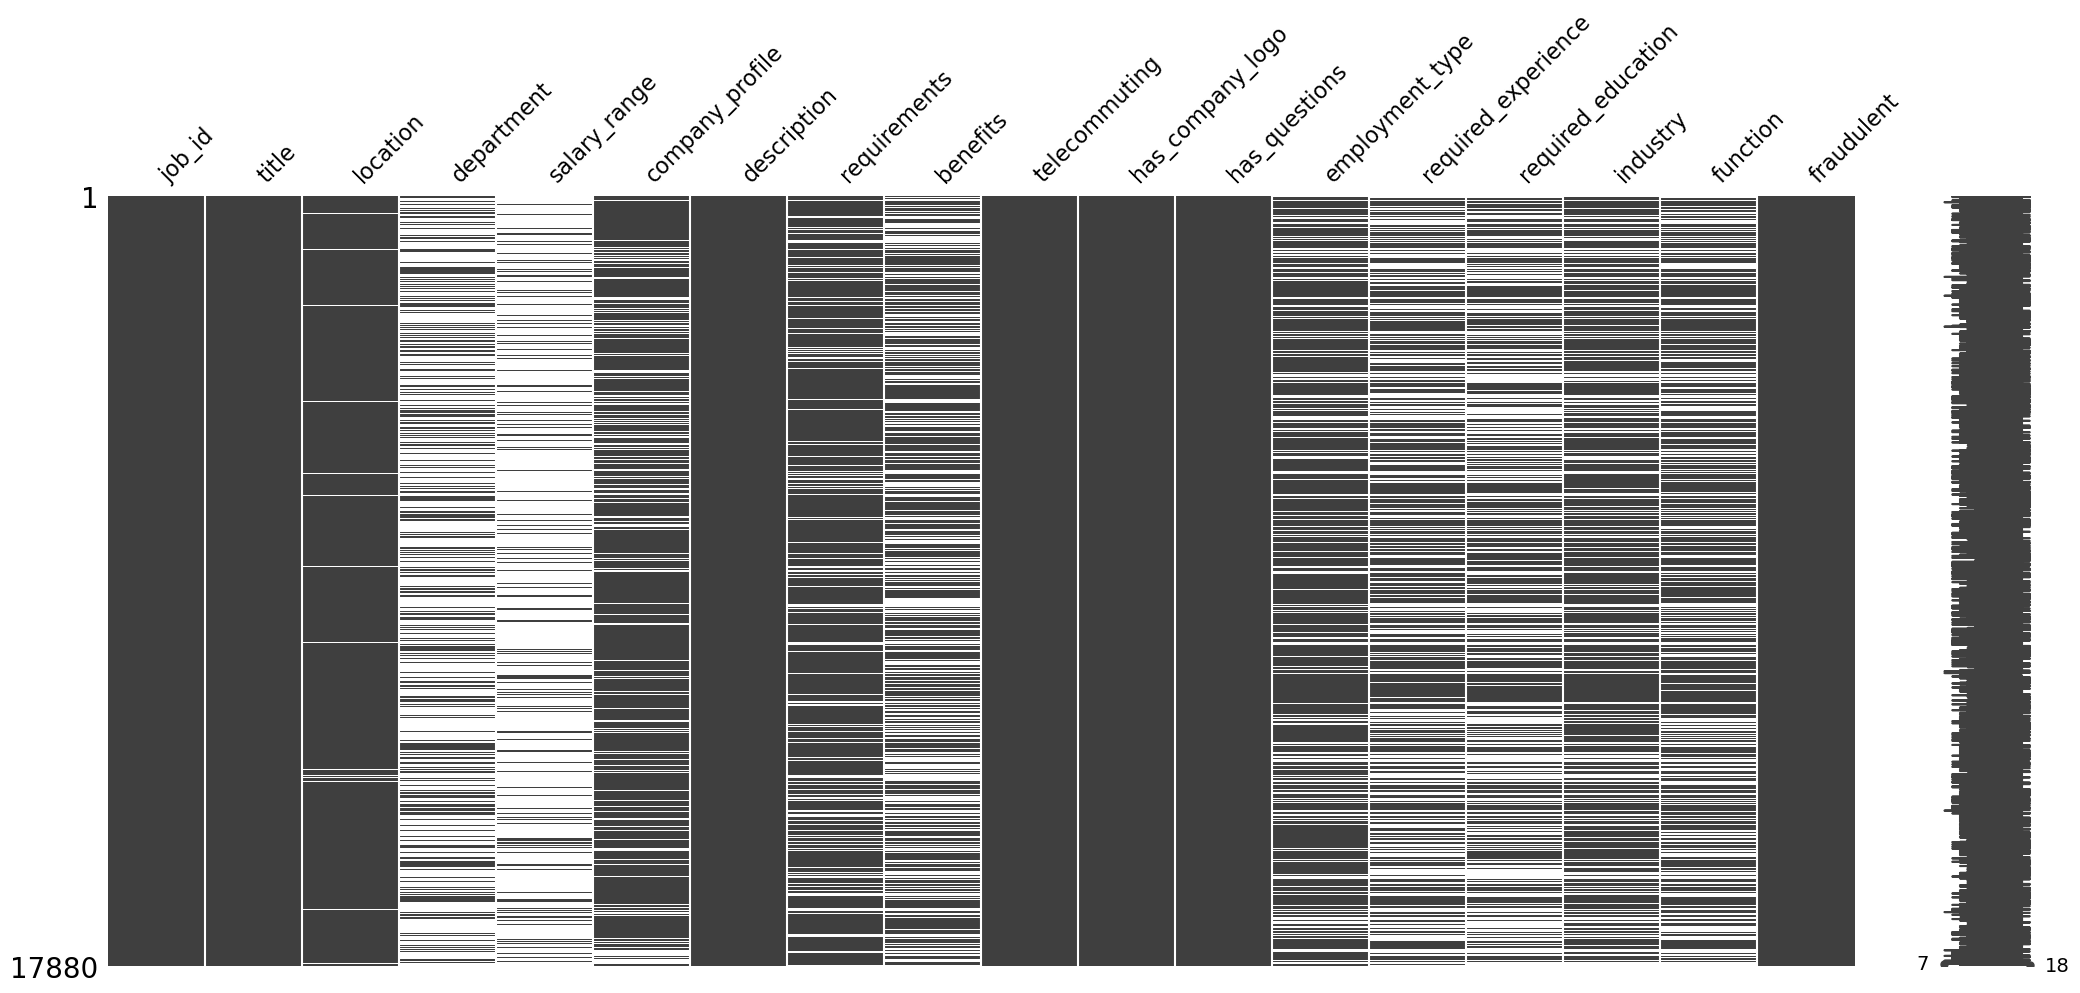

In [40]:
msno.matrix(df_jobs)

In [41]:
columnas_a_imputar = ['location','description',
       'company_profile','requirements', 'benefits','employment_type',
       'required_experience', 'industry', 'function']
df_jobs[columnas_a_imputar] = df_jobs[columnas_a_imputar].fillna('Not Found')

In [42]:
df_jobs.drop('department',inplace=True, axis=1) 
df_jobs.drop('salary_range', inplace=True, axis=1) 

In [43]:
df_jobs.isna().sum()

job_id                    0
title                     0
location                  0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education     8105
industry                  0
function                  0
fraudulent                0
dtype: int64

In [44]:
df_jobs['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [45]:
#or df_jobs['required_education'] == 'Some High School Coursework' or df_jobs['required_education'] == 'Vocational - HS Diploma':
df_jobs['required_education'] = df_jobs['required_education'].fillna('Unspecified')
df_jobs.loc[df_jobs['required_education'] == 'High School or equivalent', 'required_education'] = 'High School or less'
df_jobs.loc[df_jobs['required_education'] == 'Some High School Coursework', 'required_education'] = 'High School or less'
df_jobs.loc[df_jobs['required_education'] == 'Vocational - HS Diploma', 'required_education'] = 'High School or less'
df_jobs.loc[df_jobs['required_education'] == 'Vocational - Degree', 'required_education'] = 'Bachelor\'s Degree'


In [46]:
df_jobs['required_education'].unique()

array(['Unspecified', "Bachelor's Degree", "Master's Degree",
       'High School or less', 'Some College Coursework Completed',
       'Vocational', 'Certification', 'Associate Degree', 'Professional',
       'Doctorate'], dtype=object)

Text(0.5, 1.0, 'Mapa de Correlacion')

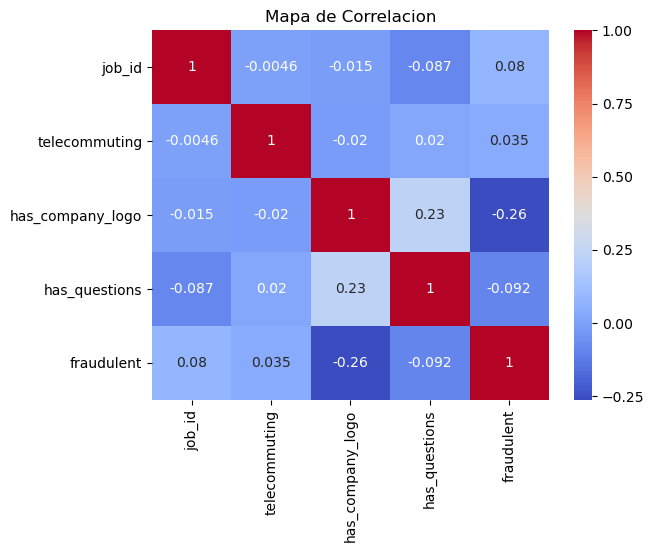

In [47]:
jobs_num= df_jobs.select_dtypes(include='int64')
sns.heatmap(jobs_num.corr(), cmap = 'coolwarm',annot=True)
plt.title('Mapa de Correlacion')

In [48]:
educationcat = df_jobs.groupby(['required_education'])
educationcat= educationcat['fraudulent'].value_counts().reset_index()

educationcat

ValueError: cannot insert fraudulent, already exists

In [49]:
df_pivot = pd.pivot_table(educationcat,
                          values="count", 
                          index="required_education", 
                          columns="fraudulent")

df_pivot.plot.bar(title='Conteo de trabajos fraudulentos y reales segun nivel de educacion requerido')

KeyError: 'count'

In [ ]:
functioncat = df_jobs.groupby(['function'])

functioncat= functioncat['fraudulent'].value_counts().reset_index()


functioncat

,function,fraudulent,count
0,Accounting/Auditing,0,183
1,Accounting/Auditing,1,29
2,Administrative,0,511
3,Administrative,1,119
4,Advertising,0,85
...,...,...,...
61,Strategy/Planning,0,45
62,Strategy/Planning,1,1
63,Supply Chain,0,36
64,Training,0,38


<Axes: title={'center': 'Conteo de numero de trabajos fraudulentes y reales segun funcion'}, xlabel='function'>

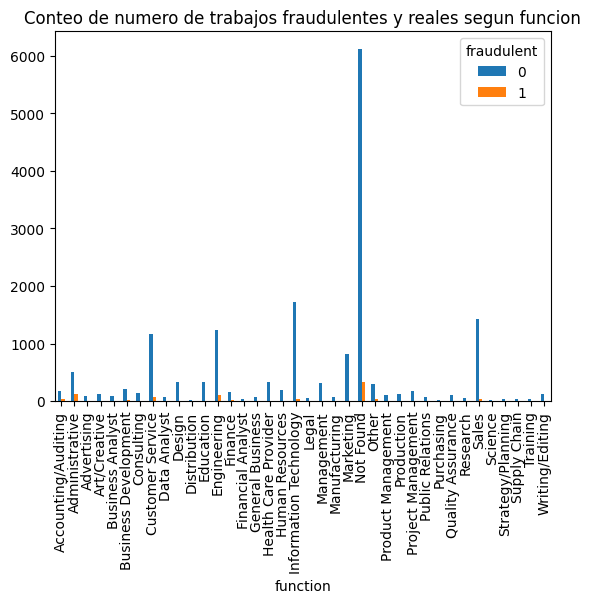

In [ ]:
df_pivot = pd.pivot_table(functioncat, 
                          values="count", 
                          index="function", 
                          columns="fraudulent")

df_pivot.plot.bar(title='Conteo de numero de trabajos fraudulentes y reales segun funcion')